In [3]:
!pip install sklearn

You should consider upgrading via the 'c:\users\bigboy\anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, datasets, metrics, model_selection
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv("train.csv")
df_normalized = df
#нормированные данные
df_normalized['SalePrice'] = df_normalized['SalePrice'].apply(lambda x:(x -df_normalized['SalePrice'].mean())/ np.std(df_normalized['SalePrice']) )
df_normalized['GrLivArea'] = df_normalized['GrLivArea'].apply(lambda x:(x -df_normalized['GrLivArea'].mean())/ np.std(df_normalized['GrLivArea']) )
df_normalized['GarageArea'] = df_normalized['GarageArea'].apply(lambda x:(x -df_normalized['GarageArea'].mean())/ np.std(df_normalized['GarageArea']) )
df_normalized['2ndFlrSF'] = df_normalized['2ndFlrSF'].apply(lambda x:(x -df_normalized['2ndFlrSF'].mean())/ np.std(df_normalized['2ndFlrSF']) )

ones = [[1]]*df_normalized['SalePrice'].shape[0]
ones = np.array(ones)
GrLivArea_normalized = []
X_normalized = []
for i in df_normalized['OverallQual'].values:
    X_normalized.append([i])
GrLivArea = []
for i in  df_normalized['GrLivArea'].values:
    GrLivArea_normalized.append([i])
    

GarageArea = []  
for i in  df_normalized['GarageArea'].values:
    GarageArea.append([i])
GarageCars = []
for i in  df_normalized['GarageCars'].values:
    GarageCars.append([i])
MoSold = []
for i in  df_normalized['MoSold'].values:
    MoSold.append([i])
FlrSF = []
for i in  df_normalized['2ndFlrSF'].values:
    FlrSF.append([i])


    
#X

X_normalized = np.hstack((X_normalized,GrLivArea_normalized,GarageCars,GarageArea,MoSold,FlrSF))

X_normalized_training = X_normalized[0:1000]
X_normalized_predicts = X_normalized[1000:df_normalized.shape[0]]
#Y
y_normalized = df_normalized['SalePrice']
y_normalized_training = y_normalized[:1000]


X_normalized


array([[ 7.        ,  0.37033344,  2.        ,  0.35100032,  2.        ,
         1.16185159],
       [ 6.        , -0.48251191,  2.        , -0.06073101,  5.        ,
        -0.79516323],
       [ 7.        ,  0.51501256,  2.        ,  0.63172623,  9.        ,
         1.18935062],
       ...,
       [ 7.        ,  1.56964722,  1.        , -1.03391416,  5.        ,
         1.84474434],
       [ 5.        , -0.83278768,  1.        , -1.09005935,  4.        ,
        -0.79516323],
       [ 5.        , -0.49393395,  1.        , -0.9216238 ,  6.        ,
        -0.79516323]])

In [294]:
#ЛИНЕЙНАЯ РЕГРЕССИЯ 
lr = linear_model.LinearRegression()
lr.fit(X_normalized_training, y_normalized_training)
lr_preds = lr.predict(X_normalized_predicts)

lr.coef_


array([ 0.31936822,  0.55036277,  0.06050659,  0.13173041, -0.01386331,
       -0.20872909])

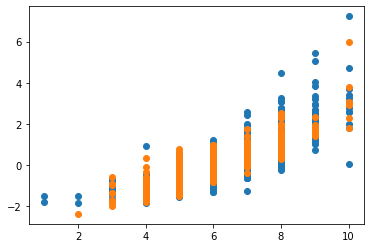

In [282]:
#кол-во комнат 


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,0], y_normalized_training)
ax.scatter(X_normalized_predicts[:,0], lr_preds)


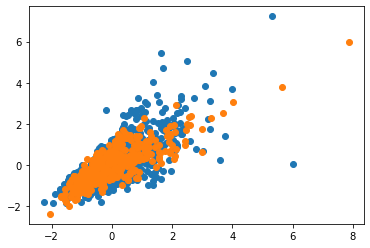

In [260]:
#площадь дома
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,1], y_normalized_training)
ax.scatter(X_normalized_predicts[:,1], lr_preds)

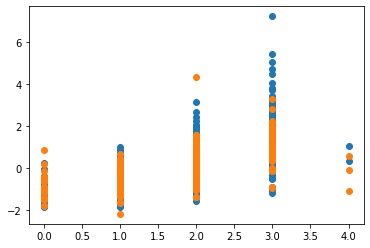

In [293]:
#кол-во машин
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,2], y_normalized_training)
ax.scatter(X_normalized_predicts[:,2], lr_preds)

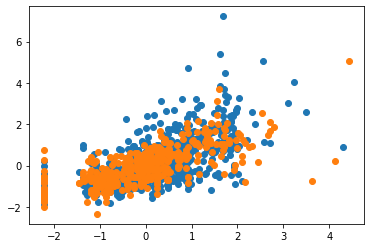

In [80]:
#площадь гаража
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,3], y_normalized_training)
ax.scatter(X_normalized_predicts[:,3], lr_preds)

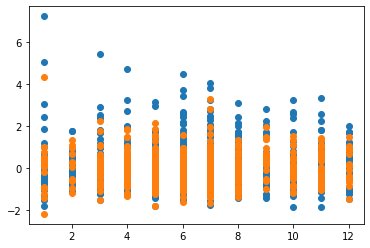

In [291]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,4], y_normalized_training)
ax.scatter(X_normalized_predicts[:,4], lr_preds)

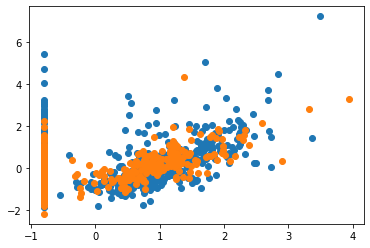

In [292]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,5], y_normalized_training)
ax.scatter(X_normalized_predicts[:,5], lr_preds)

In [284]:
#ГРЕБНЕВАЯ РЕГРЕССИЯ


lr = linear_model.Ridge(alpha=250)
lr.fit(X_normalized_training, y_normalized_training)
lr_preds = lr.predict(X_normalized_predicts)
lr.coef_


array([ 0.31702526,  0.3316142 ,  0.09824846,  0.14931755, -0.01157284,
       -0.0553624 ])

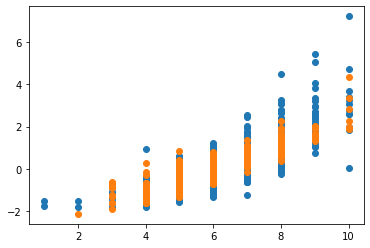

In [131]:
#кол-во комнат 
fig = plt.figure()

ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,0], y_normalized_training)
ax.scatter(X_normalized_predicts[:,0], lr_preds)



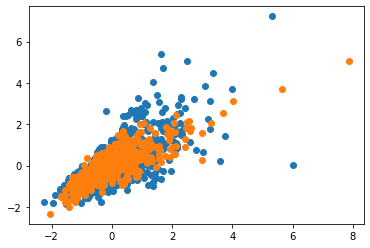

In [28]:
#площадь дома
fig = plt.figure()

ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,1], y_normalized_training)
ax.scatter(X_normalized_predicts[:,1], lr_preds)

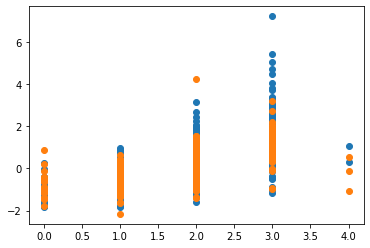

In [142]:
#кол-во машин
fig = plt.figure()

ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,2], y_normalized_training)
ax.scatter(X_normalized_predicts[:,2], lr_preds)

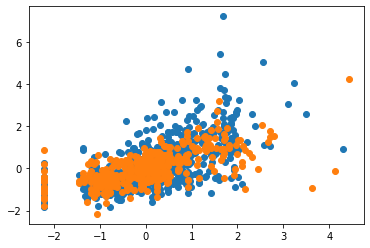

In [143]:
#площадь гаража
fig = plt.figure()

ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,3], y_normalized_training)
ax.scatter(X_normalized_predicts[:,3], lr_preds)

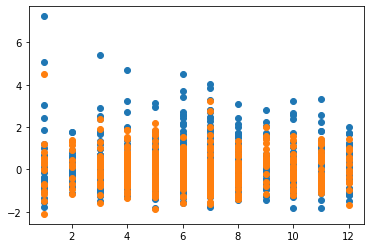

In [286]:
fig = plt.figure()

ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,4], y_normalized_training)
ax.scatter(X_normalized_predicts[:,4], lr_preds)

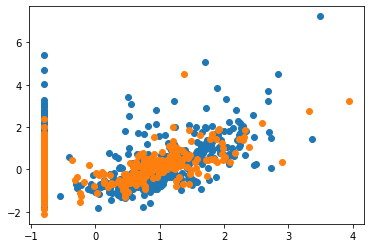

In [287]:
fig = plt.figure()

ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,5], y_normalized_training)
ax.scatter(X_normalized_predicts[:,5], lr_preds)

In [290]:
#ЛАССО РЕГРЕССИЯ



lr = linear_model.Lasso(alpha=0.089)

lr.fit(X_normalized_training, y_normalized_training)
lr_preds = lr.predict(X_normalized_predicts)
lr.coef_


array([ 0.35009117,  0.29723656,  0.        ,  0.13961034, -0.        ,
       -0.        ])

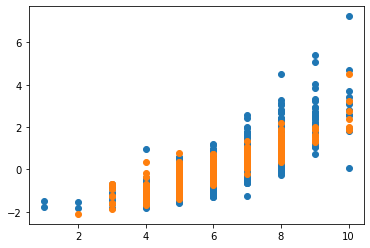

In [289]:
#кол-во комнат 
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,0], y_normalized_training)
ax.scatter(X_normalized_predicts[:,0], lr_preds)




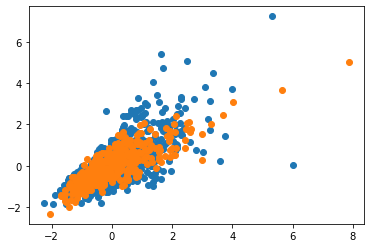

In [164]:
#площадь дома
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,1], y_normalized_training)
ax.scatter(X_normalized_predicts[:,1], lr_preds)


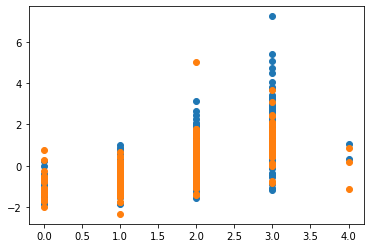

In [165]:
#кол-во машин
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,2], y_normalized_training)
ax.scatter(X_normalized_predicts[:,2], lr_preds)


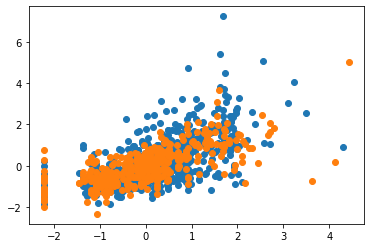

In [166]:
#площадь гаража
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,3], y_normalized_training)
ax.scatter(X_normalized_predicts[:,3], lr_preds)


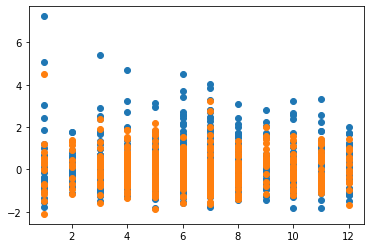

In [288]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,4], y_normalized_training)
ax.scatter(X_normalized_predicts[:,4], lr_preds)

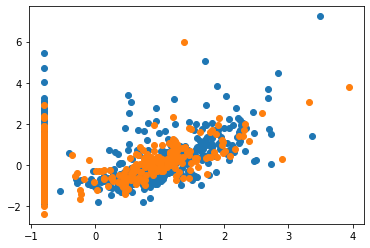

In [295]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_normalized_training[:,5], y_normalized_training)
ax.scatter(X_normalized_predicts[:,5], lr_preds)

In [ ]:
Первые 4 признака коррелируют с ценой дома в диапозоне от 0.62-0.79 ,а последниие 2   - 0.04 и 0.32 соотвественно  . Последние признаки я выбрал специально,чтобы они создавали некий шум в моих моделях.Исходя из имеющихся данных,  в моем случае лучше подходит Лассо- регрессия,т.к. у меня нет большего кол-ва признаков ,и 
лучше ненужные признаки полностью  убрать,нежели они бы создавали  не нужный шум в моей модели.В том же время Гребневая регрессия будет создавать сильные шумы,если не нужные признаки устремить к 0. 